In [1]:
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import cv2

In [2]:
m_folder = "Gallery"
train = []
s_folders = []
for folder in os.listdir(m_folder):
    s_folders.append(folder)

for s_paths in s_folders:
    PATH = m_folder + "/" + s_paths
    for image in os.listdir(PATH):
        if(image.endswith("pgm")):
            path2 = PATH + "/" + image
            img = Image.open(path2)
            train.append(np.asarray(img))


## TASK-1

1 . Display the Eigenface images corresponding to the top 5 Eigenvalues of the covariance matrix

In [3]:
w = train[0].shape[0]
h = train[0].shape[1]

In [4]:
def resizing(train):

    #considering each pixel as a feature
    #converting image which is a numpy.ndarray into (112*92) X 1 

    for i in range(len(train)):    
        train[i] = np.resize(train[i],(w*h))

    return train

re_train = resizing(train)
re_train = np.array(re_train)

In [5]:
re_train.shape

(200, 10304)

In [6]:
def mean_shift(train):
    mean = np.mean(train,axis=0)
    return train - mean

shift_train = mean_shift(re_train)


In [7]:
shift_train.shape

(200, 10304)

In [11]:
def coveriance(train):
    n = len(train) 

    cov_mat = (train)@(np.transpose(train))
        
    cov_mat = cov_mat/float(n)
    
    return cov_mat

In [12]:
cov = coveriance(shift_train)

In [13]:
cov.shape

(200, 200)

In [14]:
#SVD gives eigen values and vectores which are alrrady sorted in descending order
U, S, Vh = np.linalg.svd(cov)

In [15]:
U.shape

(200, 200)

In [17]:
#selecting only top 5 eigen vectors
top = 5
eigens = U[:,0:top]
eigens.shape

(200, 5)

In [18]:
reduced_img = np.transpose(eigens) @ shift_train

In [19]:
reduced_img.shape

(5, 10304)

TOP 5 EIGEN FACES


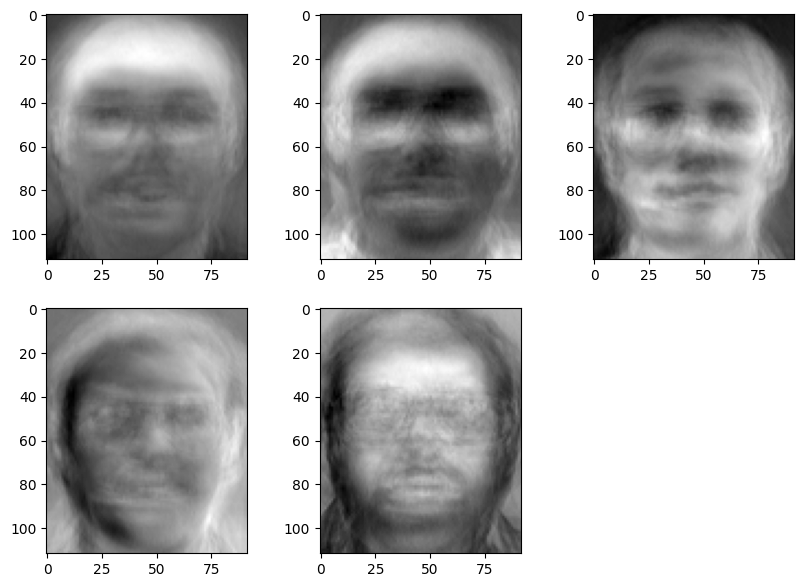

In [21]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3
print("TOP 5 EIGEN FACES")
for i in range(reduced_img.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(reduced_img[i].reshape(w,h),cmap="gray")

2 . Plot  a  graph  depicting  the  percentage  of  the  total  variance  of  the  original  data  retained  inthe  reduced  space  versus  the  number  of  dimensions.

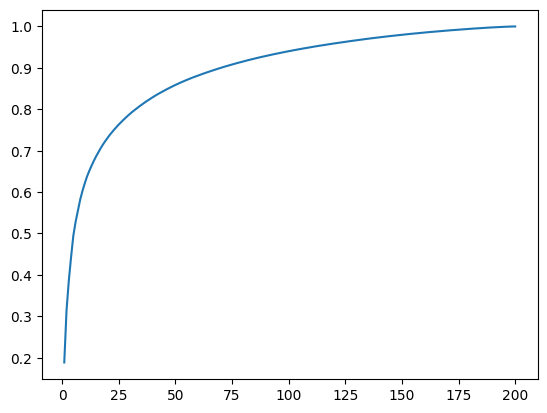

In [22]:
total = np.sum(S)
dims = []
retained= []
count = 0
for i in range(U.shape[0]):
    dims.append(i+1)
    count += S[i]
    p = count/total
    retained.append(p)

plt.plot(dims,retained)
plt.show()

At  least  85%  of  the  total  variance  of  the  original  data  is  accounted  for  in  the  reducedspace

In [23]:
for i in range(U.shape[0]):
    if retained[i] > 0.85:
        break

print("For atleast 85 percent of total varience , dimensionality required is ", i+1)

For atleast 85 percent of total varience , dimensionality required is  47


At  least  95%  of  the  total  variance  of  the  original  data  is  accounted  for  in  the  reducedspace.

In [24]:
for i in range(U.shape[0]):
    if retained[i] > 0.95:
        break

print("For atleast 95 percent of total varience , dimensionality required is ", i+1)

For atleast 95 percent of total varience , dimensionality required is  110


3 . Reconstruct the image ‘faceinput1.pgm’ using the:

Display the reconstructed image and the mean squared error in each case.

Eigenface corresponding to the largest eigenvalue.

MSE :  22690.341330814314


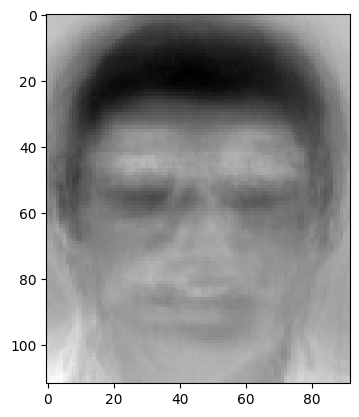

In [32]:
top = 1
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[0].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[0][i] - eigen_img[0][i]) ** 2

error = error/(w*h)

print("MSE : " , error)


Top 4 Eigenfaces.

MSE :  17505.005079348877


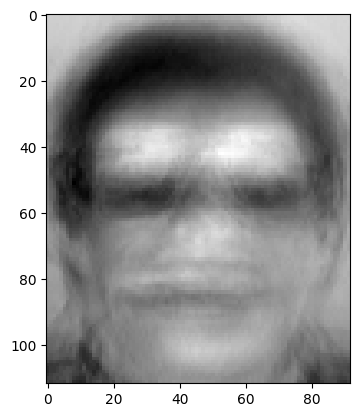

In [31]:
top = 4
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[0].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[0][i] - eigen_img[0][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

Top 15 Eigenfaces.

MSE :  14210.98896285048


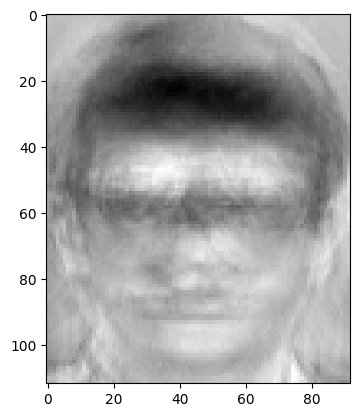

In [30]:
top = 15
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[0].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[0][i] - eigen_img[0][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

Top 150 Eigenfaces.

MSE :  13507.374741123858


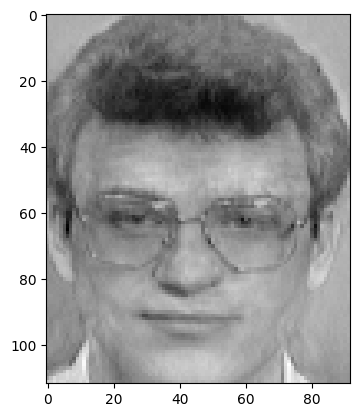

In [29]:
top = 150
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[0].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[0][i] - eigen_img[0][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

All the Eigenfaces.

MSE :  13474.609398556384


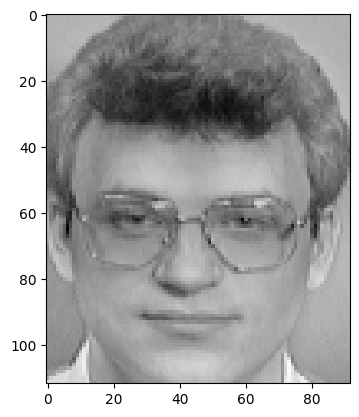

In [28]:
top = U.shape[0]
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[0].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[0][i] - eigen_img[0][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

4 . Depict graphically the mean squared error obtained for different numbers of Eigenfaces.  Notethat the Eigenfaces will vary from 1 to 199 (total number of training samples-1).

In [33]:
tops = []
errors = []
for top in range(U.shape[0]):
    tops.append(top)
    eigens = U[:,0:top]
    reduced_img = np.transpose(eigens) @ shift_train
    eigen_img = eigens @ reduced_img

    error = 0
    for i in range(w*h):
        error += (train[0][i] - eigen_img[0][i]) ** 2

    error = error/(w*h)

    errors.append(error)

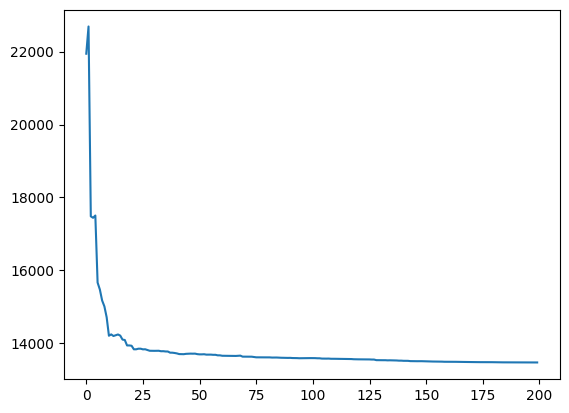

In [34]:
plt.plot(tops,errors)
plt.show()

5 .Repeat parts (iii) and (iv) for the image faceinput2.pgm.

MSE :  12935.512623797085


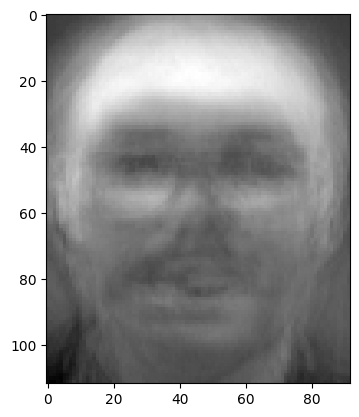

In [35]:
top = 1
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[5].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[5][i] - eigen_img[5][i]) ** 2

error = error/(w*h)

print("MSE : " , error)


MSE :  14916.062103533695


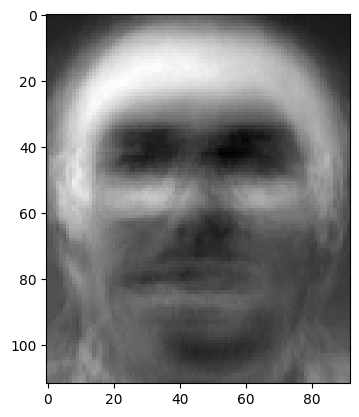

In [36]:
top = 4
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[5].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[5][i] - eigen_img[5][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

MSE :  14403.84788222851


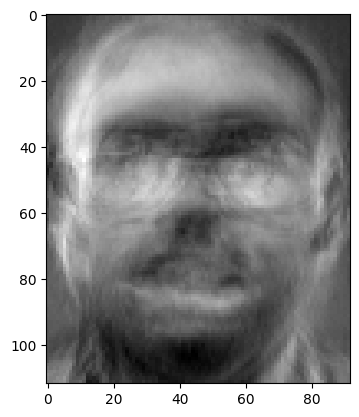

In [37]:
top = 15
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[5].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[5][i] - eigen_img[5][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

MSE :  13476.096250060724


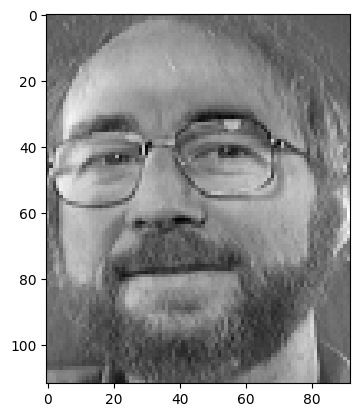

In [38]:
top = 150
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[5].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[5][i] - eigen_img[5][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

MSE :  13474.609398556382


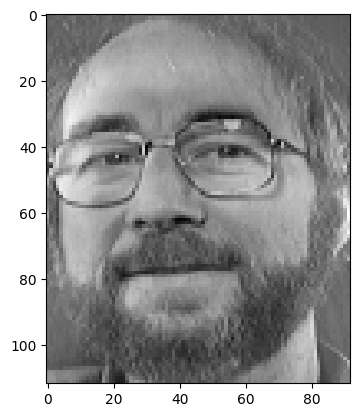

In [39]:
top = U.shape[0]
eigens = U[:,0:top]


reduced_img = np.transpose(eigens) @ shift_train
eigen_img = eigens @ reduced_img

plt.imshow(eigen_img[5].reshape(w,h),cmap="gray") #faceinput1

error = 0
for i in range(w*h):
    error += (train[5][i] - eigen_img[5][i]) ** 2

error = error/(w*h)

print("MSE : " , error)

In [40]:
tops = []
errors = []
for top in range(U.shape[0]):
    tops.append(top)
    eigens = U[:,0:top]
    reduced_img = np.transpose(eigens) @ shift_train
    eigen_img = eigens @ reduced_img

    error = 0
    for i in range(w*h):
        error += (train[5][i] - eigen_img[5][i]) ** 2

    error = error/(w*h)

    errors.append(error)

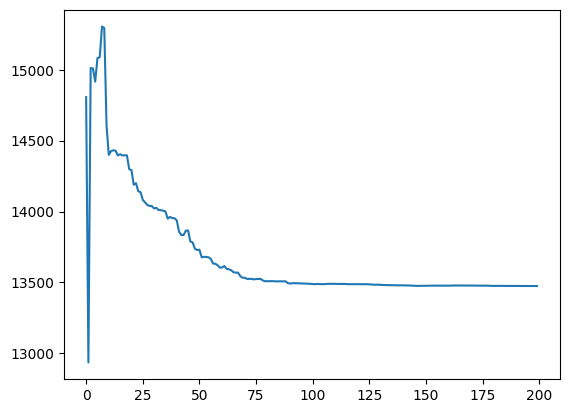

In [41]:
plt.plot(tops,errors)
plt.show()

## TASK-2